In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
 
# Features of the whole slide images extracted using rotation- invariant local Binary pattern (LBP), Entropy
her2=pd.read_csv('FeaturesCombinednewscore.csv')

In [2]:
print("Number of rows and Columns in the feature space: \n", her2.shape)
print(her2.columns)
print("==============================================")
print("Show top ten feature sets: \n", her2.head(10))
print(her2.info())
print("******************************************")
print("Analysis null values in the dataset: \n", her2.isnull().sum())

Number of rows and Columns in the feature space: 
 (4019, 41)
Index(['FILENAME', 'CC0', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'CC6', 'CC7',
       'CC8', 'CC9', 'UL0_0', 'UL0_1', 'UL0_2', 'UL0_3', 'UL0_4', 'UL1_0',
       'UL1_1', 'UL1_2', 'UL1_3', 'UL1_4', 'UL2_0', 'UL2_1', 'UL2_2', 'UL2_3',
       'UL2_4', 'UL3_0', 'UL3_1', 'UL3_2', 'UL3_3', 'UL3_4', 'UL4_0', 'UL4_1',
       'UL4_2', 'UL4_3', 'UL4_4', 'CONN', 'ENER', 'ENTR', 'SCORE',
       'SCORE_New'],
      dtype='object')
Show top ten feature sets: 
         FILENAME        CC0       CC1       CC2  CC3  CC4  CC5  CC6  CC7  CC8  \
0  c01_T0001.png  14.273789  1.898998  0.010434  0.0  0.0  0.0  0.0  0.0  0.0   
1  c01_T0002.png  16.392117  1.950480  0.010106  0.0  0.0  0.0  0.0  0.0  0.0   
2  c01_T0003.png  16.919462  1.495407  0.032044  0.0  0.0  0.0  0.0  0.0  0.0   
3  c01_T0004.png  17.721520  1.868110  0.030625  0.0  0.0  0.0  0.0  0.0  0.0   
4  c01_T0005.png  15.957848  1.750094  0.028227  0.0  0.0  0.0  0.0  0.0  0.0   
5  c0

Text(0.5, 1.0, 'Target Class Distribution')

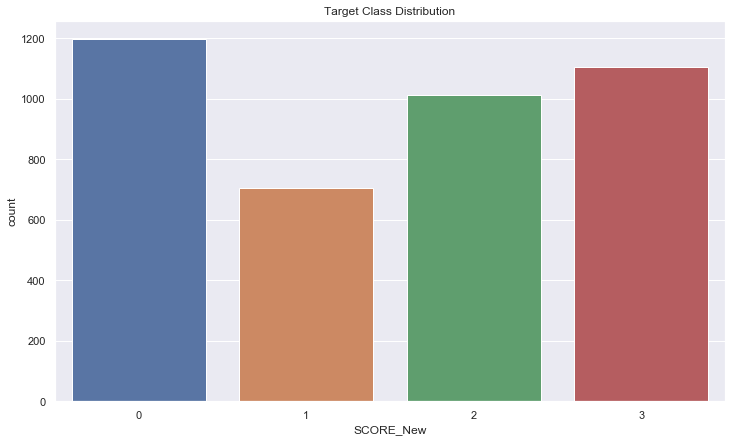

In [3]:
# Visual Representation of the dependent (Target) variable distribution in the dataset
sns.set(rc={'figure.figsize':(12,7)})
score_her2=her2['SCORE_New']
df1_count=sns.countplot(x=score_her2, data=her2)
plt.title("Target Class Distribution")

In [4]:
# Numerial representation of number of counts in each score type 
print(her2['SCORE_New']. value_counts())

0    1198
3    1105
2    1012
1     704
Name: SCORE_New, dtype: int64


In [5]:
# Separate features from the target class/ score 
F_her2=her2.drop(['FILENAME', 'SCORE' , 'SCORE_New'],  axis=1)
S_her2=her2['SCORE_New']
print(F_her2.shape)
print(F_her2.head())

print("=======================================================================================================================")

print(S_her2.shape)
print(S_her2.head())

# Reshape the target variable 
S_her2=her2['SCORE_New'].values.reshape(-1,1)
print("=======================================================================================================================")
print(S_her2.shape)

(4019, 38)
         CC0       CC1       CC2  CC3  CC4  CC5  CC6  CC7  CC8  CC9  ...  \
0  14.273789  1.898998  0.010434  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  16.392117  1.950480  0.010106  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  16.919462  1.495407  0.032044  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  17.721520  1.868110  0.030625  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  15.957848  1.750094  0.028227  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   UL3_3  UL3_4     UL4_0  UL4_1  UL4_2  UL4_3  UL4_4      CONN       ENER  \
0    0.0    0.0  0.046921    0.0    0.0    0.0    0.0  2.639816  11.434577   
1    0.0    0.0  0.056458    0.0    0.0    0.0    0.0  2.556847  11.532461   
2    0.0    0.0  0.050735    0.0    0.0    0.0    0.0  2.478103  11.212985   
3    0.0    0.0  0.049591    0.0    0.0    0.0    0.0  2.368314  10.663307   
4    0.0    0.0  0.044632    0.0    0.0    0.0    0.0  1.298457  10.811545   

       ENTR  
0  3.805652  
1  3.793491  
2  3.823998  
3  3.87

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(F_her2, S_her2, test_size=0.28, random_state=42)
print(x_train.shape); print(x_test.shape)

(2893, 38)
(1126, 38)


Create neural network model: 

In [18]:
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
from tensorflow import set_random_seed
import tensorflow as tf

In [21]:
# Define a function to create a model
def create_model(lyrs=[8], act='relu', opt='Adam', dr=0.0):
    
    # fix random seed for conformity
    seed(42)
    set_random_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))

    
    # add dropout, default is none for this case 
    model.add(Dropout(dr))
    
    # create output layer with sigmoid activation function 
    model.add(Dense(4, activation='sigmoid')) 
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [22]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 312       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total params: 348
Trainable params: 348
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# train model on full train set, with 80/20 CV split
training = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


val_acc: 85.57%


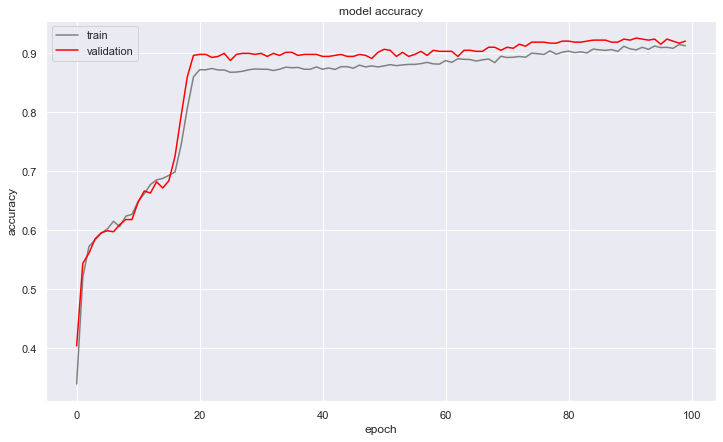

In [24]:
# summarize history for accuracy
plt.plot(training.history['acc'], color='gray')
plt.plot(training.history['val_acc'], color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1. Grid Search:  
Let's use grid search to find out what the optimal values for batch_size and epochs.

In [25]:
# create model for the classifier 
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 28, 32, 64]
epochs = [50, 100, 150, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  

grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... batch_size=16, epochs=50, total=  15.0s
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


[CV] ......................... batch_size=16, epochs=50, total=  14.0s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=  14.0s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=  25.8s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=  26.6s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=  28.7s
[CV] batch_size=16, epochs=150 .......................................
[CV] ........................ batch_size=16, epochs=150, total=  42.4s
[CV] batch_size=16, epochs=150 .......................................
[CV] ........................ batch_size=16, epochs=150, total=  42.2s
[CV] batch_size=16, epochs=150 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 22.9min finished


In [26]:
# Consolidate the outcome
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.915658 using {'batch_size': 28, 'epochs': 150}
0.886277 (0.002473) with: {'batch_size': 16, 'epochs': 50}
0.897684 (0.005508) with: {'batch_size': 16, 'epochs': 100}
0.901486 (0.004497) with: {'batch_size': 16, 'epochs': 150}
0.912893 (0.012044) with: {'batch_size': 16, 'epochs': 200}
0.879710 (0.005561) with: {'batch_size': 28, 'epochs': 50}
0.899412 (0.003926) with: {'batch_size': 28, 'epochs': 100}
0.915658 (0.006588) with: {'batch_size': 28, 'epochs': 150}
0.914967 (0.011101) with: {'batch_size': 28, 'epochs': 200}
0.878327 (0.006018) with: {'batch_size': 32, 'epochs': 50}
0.892499 (0.007340) with: {'batch_size': 32, 'epochs': 100}
0.902869 (0.014062) with: {'batch_size': 32, 'epochs': 150}
0.902178 (0.009856) with: {'batch_size': 32, 'epochs': 200}
0.877290 (0.003961) with: {'batch_size': 64, 'epochs': 50}
0.880055 (0.006152) with: {'batch_size': 64, 'epochs': 100}
0.889388 (0.009845) with: {'batch_size': 64, 'epochs': 150}
0.894919 (0.012383) with: {'batch_size': 64, 'epo

Lets figure out best optimizer for the dataset to reduce the losses and enhance the accuracy. 

In [27]:
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=28, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=  38.8s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.7s remaining:    0.0s


[CV] .......................................... opt=SGD, total=  40.6s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=  43.1s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  40.2s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  40.4s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  44.8s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=  45.0s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total= 1.1min
[CV] opt=Adagrad .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 14.0min finished


In [28]:
# Consolidate the outcome
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.915313 using {'opt': 'Adam'}
0.698237 (0.005249) with: {'opt': 'SGD'}
0.912893 (0.009437) with: {'opt': 'RMSprop'}
0.877636 (0.004725) with: {'opt': 'Adagrad'}
0.909782 (0.010767) with: {'opt': 'Adadelta'}
0.915313 (0.007063) with: {'opt': 'Adam'}
0.911511 (0.010960) with: {'opt': 'Nadam'}


In [29]:
seed(42)
set_random_seed(42)

# create model for finding the best possible hidden neurons 
model = KerasClassifier(build_fn=create_model, 
                        epochs=150, batch_size=28, verbose=0)

# define the grid search parameters 
layers = [[38,4],[17],[17,8],[17,4],[17,8,4]] # 38 and 17 hidden neuron units. 4 and 8 hidden layers
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] lyrs=[38, 4] ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................................... lyrs=[38, 4], total=  55.4s
[CV] lyrs=[38, 4] ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.3s remaining:    0.0s


[CV] ..................................... lyrs=[38, 4], total= 1.2min
[CV] lyrs=[38, 4] ....................................................
[CV] ..................................... lyrs=[38, 4], total= 1.3min
[CV] lyrs=[17] .......................................................
[CV] ........................................ lyrs=[17], total= 1.2min
[CV] lyrs=[17] .......................................................
[CV] ........................................ lyrs=[17], total= 1.3min
[CV] lyrs=[17] .......................................................
[CV] ........................................ lyrs=[17], total= 1.1min
[CV] lyrs=[17, 8] ....................................................
[CV] ..................................... lyrs=[17, 8], total= 1.7min
[CV] lyrs=[17, 8] ....................................................
[CV] ..................................... lyrs=[17, 8], total= 1.7min
[CV] lyrs=[17, 8] ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 20.8min finished


In [31]:
#summarize model results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.946422 using {'lyrs': [38, 4]}
0.946422 (0.004340) with: {'lyrs': [38, 4]}
0.731766 (0.308036) with: {'lyrs': [17]}
0.861390 (0.113305) with: {'lyrs': [17, 8]}
0.941583 (0.001755) with: {'lyrs': [17, 4]}
0.548566 (0.150850) with: {'lyrs': [17, 8, 4]}


Define a model for finding dropout: A dropout layer randomly drops some of the connections between layers. 

In [32]:
# Create model for finding dropouts
model = KerasClassifier(build_fn=create_model, 
                        epochs=150, batch_size=28, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... dr=0.0, total=  59.9s
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.8s remaining:    0.0s


[CV] ........................................... dr=0.0, total= 1.4min
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=  55.9s
[CV] dr=0.01 .........................................................
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[CV] .......................................... dr=0.01, total=  58.4s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=  59.7s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total= 1.0min
[CV] dr=0.05 .........................................................
[CV] .......................................... dr=0.05, total= 1.0min
[CV] dr=0.05 .........................................................
[CV] ............................

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 26.0min finished


In [33]:
# Consolidate the outcome
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940892 using {'dr': 0.01}
0.914621 (0.006428) with: {'dr': 0.0}
0.940892 (0.004711) with: {'dr': 0.01}
0.938818 (0.002566) with: {'dr': 0.05}
0.937090 (0.006382) with: {'dr': 0.1}
0.922572 (0.006919) with: {'dr': 0.2}
0.667819 (0.019904) with: {'dr': 0.5}


In [64]:
# create final Neural Network Model for the Feature sets
model = create_model(lyrs=[38,4])

print(model.summary())

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_246 (Dense)            (None, 38)                1482      
_________________________________________________________________
dense_247 (Dense)            (None, 4)                 156       
_________________________________________________________________
dropout_113 (Dropout)        (None, 4)                 0         
_________________________________________________________________
dense_248 (Dense)            (None, 4)                 20        
Total params: 1,658
Trainable params: 1,658
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
training = model.fit(x_train, y_train, epochs=150, batch_size=28, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2893/2893 [==============================] - 1s 173us/step

acc: 96.89%


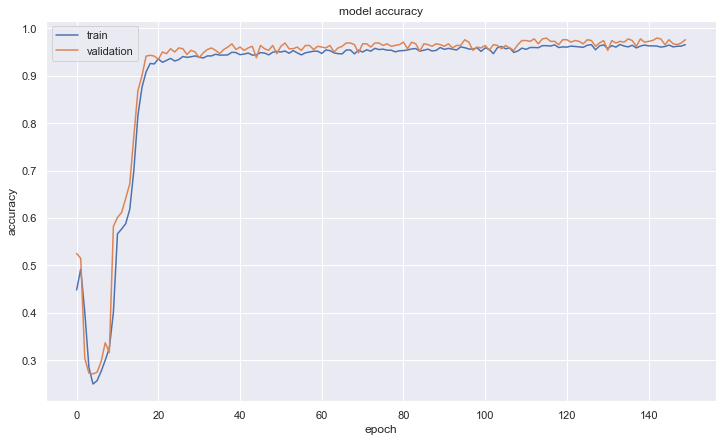

In [66]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [67]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1126/1126 [==============================] - 0s 216us/step

acc: 95.74%


In [68]:
# serialize weights to HDF5
# save the final model for future prediction
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
